## Homework 1
#### Kevin Saavedra

This assignment was completed using the Python with the Pandas data analysis libary. It was run using Jupyter notebooks, which is being encouraged at Metro for data sharing and reproducibility purposes.

In [1]:
import os
import pandas as pd
import matplotlib as plt

#wd = '/Users/kevin/Desktop/USP_587_data/OHAS_v2/'
wd = 'C:/Users/saavedrak/Desktop/USP_587_data/OHAS_v2/'

df = pd.read_csv(os.path.join(
    os.path.dirname("__file__"), 
    wd + 'household.csv'), usecols=['resty', 'income', 'hhveh', 'htrips'])

# Count number of rows/columns in dataset:
print(df.shape)

(6449, 4)


count    6444.000000
mean        1.395872
std         0.825739
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         7.000000
Name: resty, dtype: float64


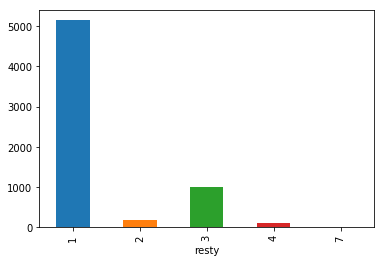

In [37]:
print(df_resty['resty'].describe())
grouped = df_resty.groupby(['resty'])['resty'].count()
grouped.plot.bar();

count    6019.000000
mean        5.056156
std         1.911337
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max         8.000000
Name: income, dtype: float64


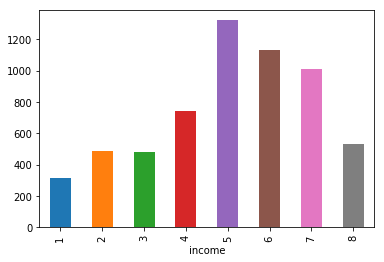

In [38]:
# Exclude responses of 99 'REFUSED'
df_inc = df.loc[df['income'] != 99]
print(df_inc['income'].describe())
grouped = df_inc.groupby(['income'])['income'].count()
grouped.plot.bar();

count    6449.000000
mean        1.948209
std         1.124169
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         8.000000
Name: hhveh, dtype: float64


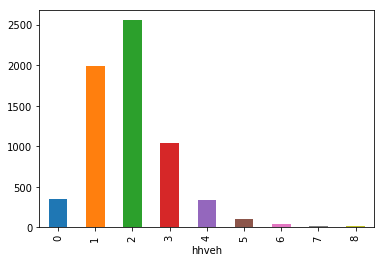

In [39]:
df_veh = df.loc[df['hhveh'] != 99]
print(df_veh['hhveh'].describe())
grouped = df_veh.groupby(['hhveh'])['hhveh'].count()
grouped.plot.bar();

count    6449.000000
mean        9.815165
std         7.819117
min         0.000000
25%         4.000000
50%         8.000000
75%        14.000000
max        81.000000
Name: htrips, dtype: float64


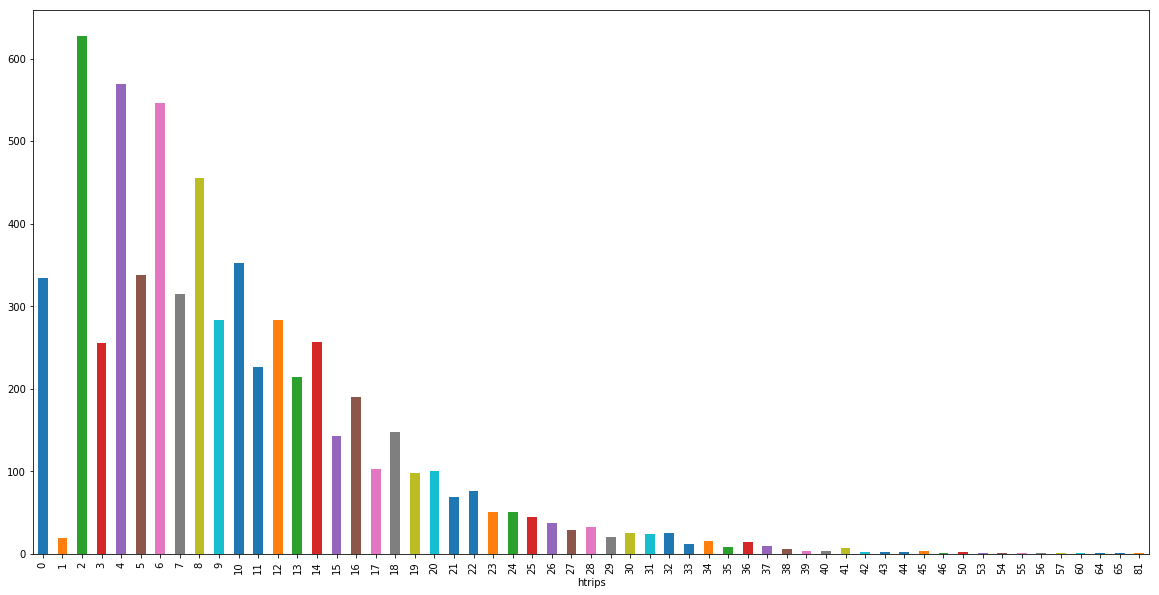

In [43]:
print(df['htrips'].describe())
grouped = df_veh.groupby(['htrips'])['htrips'].count()
grouped.plot.bar(figsize=(20,10));

*Calculate average number of trips by vehicle:*

hhveh
0     7.925072
1     6.988945
2    11.066562
3    11.666027
4    12.160350
5    12.377358
6    10.906977
7    13.416667
8     8.916667
Name: htrips, dtype: float64


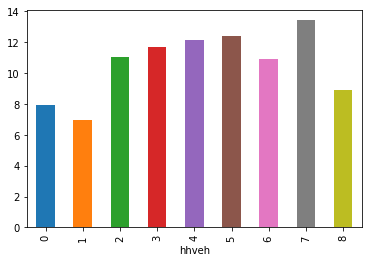

In [45]:
df_v1 = df.groupby(['hhveh'])['htrips'].mean()
print(df_v1)
df_v1.plot.bar();

*Calculate average number of trips by income:*

In [7]:
df_vi = df.groupby(['income'])['htrips'].mean()
print(df_vi)

income
1      6.359873
2      6.837113
3      6.828810
4      8.079408
5      9.677517
6     11.241623
7     12.244817
8     12.622642
99     9.500000
Name: htrips, dtype: float64


*Based on your calculation, how do you describe the relationship between number of vehicles and number of trips?*

Having two or more vehicles generally sees an increase in number of trips compared to zero or single-car households. The largest jump is from 1 to 2 cars per household, a 57% increase in trips. However, there is little difference between having 2-7 cars per household in terms of trips. The highest number of cars owned per household (8) actually sees fewer trips than the next highest categories.

*Income?*

Lowest income levels have similar numbers of trips, but generally speaking, the number of trips increase with income. Again, the highest income group drops off in terms of trips.

*Create a new variable INC_CAT that collapses the 8 income categories in the raw INCOME column into 3 categories (e.g. $0 - $24,999, $25,000 - $49,999, $50,000 and above). Count number of households within each INC_CAT and then calculate average number of trips by INC_CAT.*

In [8]:
def income_categorizer(df_inc):
    for index, row in df_inc.iterrows():
        if row.income <= 2:
            df_inc.set_value(index, 'inc_cat', 1)
        elif row.income >= 3 and row.income <= 4:
            df_inc.set_value(index, 'inc_cat', 2)
        elif row.income >= 5:
            df_inc.set_value(index, 'inc_cat', 3)
    return df_inc
        
df_new_inc_cat = income_categorizer(df)
print("Total numbers of households per INC_CAT:")
print(df_new_inc_cat.groupby(['inc_cat']).size())
print("\n")
print("Average number of trips by INC_CAT:")
print(df_new_inc_cat.groupby(['inc_cat'])['htrips'].mean())

C:\Users\saavedrak\AppData\Local\Continuum\anaconda2\envs\python3.6\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\saavedrak\AppData\Local\Continuum\anaconda2\envs\python3.6\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\saavedrak\AppData\Local\Continuum\anaconda2\envs\python3.6\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


Total numbers of households per INC_CAT:
inc_cat
1.0     799
2.0    1222
3.0    4428
dtype: int64


Average number of trips by INC_CAT:
inc_cat
1.0     6.649562
2.0     7.589198
3.0    11.000678
Name: htrips, dtype: float64


*Create a new variable INCVAL that is equal to the mid-point of the range for categories 1 through 7 and $250,000 for category 8 (Set missing values for category 99). Run frequencies and summary to compute the mean and standard deviation for this new variable. Calculate the correlation between INCVAL and number of trips (HTRIPS).*

In [9]:
def set_incval(df_incval):
    for index, row in df_incval.iterrows():
        if row.income == 1:
            df_incval.set_value(index, 'incval', ((14999-0)/2 + 0))
        elif row.income == 2:
            df_incval.set_value(index, 'incval', ((15000-24999)/2 + 24999))
        elif row.income == 3:
            df_incval.set_value(index, 'incval', ((34999-25000)/2 + 25000))
        elif row.income == 4:
            df_incval.set_value(index, 'incval', ((49999-35000)/2 + 35000))
        elif row.income == 5:
            df_incval.set_value(index, 'incval', ((74999-50000)/2 + 50000))
        elif row.income == 6:
            df_incval.set_value(index, 'incval', ((99999-75000)/2 + 75000)) 
        elif row.income == 7:
            df_incval.set_value(index, 'incval', ((149999-100000)/2 + 100000))
        elif row.income == 8:
            df_incval.set_value(index, 'incval', 250000)
        elif row.income == 99:
            df_incval.set_value(index, 'incval', None)          
    return df_incval

df_incval_new = set_incval(df_new_inc_cat)
print(df_incval_new.describe())

C:\Users\saavedrak\AppData\Local\Continuum\anaconda2\envs\python3.6\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\saavedrak\AppData\Local\Continuum\anaconda2\envs\python3.6\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\saavedrak\AppData\Local\Continuum\anaconda2\envs\python3.6\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\saavedrak\AppData\Local\Continuum\anaconda2\envs\python3.6\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors inste

             hhveh        resty       income       htrips      inc_cat  \
count  6449.000000  6449.000000  6449.000000  6449.000000  6449.000000   
mean      1.948209     1.401768    11.320050     9.815165     2.562723   
std       1.124169     0.852127    23.509842     7.819117     0.702804   
min       0.000000     1.000000     1.000000     0.000000     1.000000   
25%       1.000000     1.000000     4.000000     4.000000     2.000000   
50%       2.000000     1.000000     5.000000     8.000000     3.000000   
75%       2.000000     1.000000     7.000000    14.000000     3.000000   
max       8.000000     9.000000    99.000000    81.000000     3.000000   

              incval  
count    6019.000000  
mean    82889.558980  
std     62390.205001  
min      7499.500000  
25%     42499.500000  
50%     62499.500000  
75%    124999.500000  
max    250000.000000  


*Explain why the mean and standard deviation from the original income category (INCOME) variable would not be useful.*

Original INCOME variables are not useful since they are coded values and do accurately convey the actual dollar amounts needed for useful analysis.

*Calculate the correlation between INCVAL and number of trips*

In [10]:
print('Correlation between incval and htrips:')
print(df_incval_new['incval'].corr(df_incval_new['htrips']))

Correlation between incval and htrips:
0.22775753948597108


*Recode HHVEH into a new variable HHVEH_CAT to reduce the size of the table (this will make interpretation easier). Use judgment about which groups to combine (review your frequency analysis in Question a) in making these judgments). You can accomplish the regrouping by using the RECODE command in SPSS (or cut function in R and if function in Excel). When grouping variables, you should create a new variable and modify the variable name value labels appropriately. Calculate average number of trips by HHVEH_CAT. What is the advantage of this calculation comparing with the average number of trips by number of vehicles in question b)?*

In [11]:
def vehicle_categorizer(df_veh):
    for index, row in df_inc.iterrows():
        if row.hhveh == 0:
            df_veh.set_value(index, 'hhveh_cat', 0)
        elif row.hhveh == 1:
            df_veh.set_value(index, 'hhveh_cat', 1)
        elif row.hhveh == 2:
            df_veh.set_value(index, 'hhveh_cat', 2)
        elif row.hhveh >= 3:
            df_veh.set_value(index, 'hhveh_cat', 3)
    return df_veh


df_veh_cat_new = vehicle_categorizer(df)
print(df_veh_cat_new.groupby(['hhveh_cat'])['htrips'].mean())

C:\Users\saavedrak\AppData\Local\Continuum\anaconda2\envs\python3.6\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\saavedrak\AppData\Local\Continuum\anaconda2\envs\python3.6\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\saavedrak\AppData\Local\Continuum\anaconda2\envs\python3.6\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\saavedrak\AppData\Local\Continuum\anaconda2\envs\python3.6\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors ins

hhveh_cat
0.0     7.973134
1.0     6.999454
2.0    11.125842
3.0    11.713220
Name: htrips, dtype: float64


*What is the advantage of this calculation comparing with the average number of trips by number of vehicles in question b)?*

Regrouping the hhveh number allows us to better match average vehicle ownership rates per household in the U.S. 

In [12]:
print('Correlation between income and htrips:')
print(df_veh_cat_new['income'].corr(df_veh_cat_new['htrips']))
print('Correlation between incval and htrips:')
print(df_veh_cat_new['incval'].corr(df_veh_cat_new['htrips']))
print('Correlation between inc_cat and htrips:')
print(df_veh_cat_new['inc_cat'].corr(df_veh_cat_new['htrips']))
print('Correlation between hhveh and htrips:')
print(df_veh_cat_new['hhveh'].corr(df_veh_cat_new['htrips']))
print('Correlation between hhveh_cat and htrips:')
print(df_veh_cat_new['hhveh_cat'].corr(df_veh_cat_new['htrips']))

Correlation between income and htrips:
0.009354924462337915
Correlation between incval and htrips:
0.22775753948597108
Correlation between inc_cat and htrips:
0.21953006181990783
Correlation between hhveh and htrips:
0.20514602823433548
Correlation between hhveh_cat and htrips:
0.22888844496188693


In [13]:
print('Correlation between income and resty:')
print(df_veh_cat_new['income'].corr(df_veh_cat_new['resty']))
print('Correlation between incval and resty:')
print(df_veh_cat_new['incval'].corr(df_veh_cat_new['resty']))
print('Correlation between inc_cat and resty:')
print(df_veh_cat_new['inc_cat'].corr(df_veh_cat_new['resty']))
print('Correlation between hhveh and resty:')
print(df_veh_cat_new['hhveh'].corr(df_veh_cat_new['resty']))
print('Correlation between hhveh_cat and resty:')
print(df_veh_cat_new['hhveh_cat'].corr(df_veh_cat_new['resty']))

Correlation between income and resty:
-0.0162821497354745
Correlation between incval and resty:
-0.2803100704706675
Correlation between inc_cat and resty:
-0.3519339774256669
Correlation between hhveh and resty:
-0.3621330617193173
Correlation between hhveh_cat and resty:
-0.41460350230683385


*Explain what the weight column (hhwgt and exphhwgt) is (or does)?*

Weights households to give more emphasis to certain responses.

*Create a new variable by multiplying the number of trips with the household weighting factor (exphhwgt), for example, for the first household in the household table in OHAS data set, 3 vehicles &ast; weighting factor of 217.05 = 651.15 weighted vehicles*

In [14]:
df = pd.read_csv(os.path.join(
    os.path.dirname("__file__"), 
    wd + 'household.csv'), usecols=['resty', 'income', 'hhveh', 
                                    'hhwgt', 'htrips', 'exphhwgt'])
df['hhvehwgt'] = df['exphhwgt'] * df['hhveh']
print(df.iloc[0])

hhveh         3.000000
resty         1.000000
income        5.000000
htrips        6.000000
hhwgt         1.591203
exphhwgt    217.054444
hhvehwgt    651.163331
Name: 0, dtype: float64


*Sum the new variable created in step 1 over all samples (households) and sum the entire weighting factor (exphhwgt) over all samples (households);*

In [15]:
sum_hhvehwgt = df['hhvehwgt'].sum()
sum_exphhwgt = df['exphhwgt'].sum()
print("hhvehwgt sum =", sum_hhvehwgt)
print("exphhwgt sum =", sum_exphhwgt)

hhvehwgt sum = 1487688.81285771
exphhwgt sum = 807567.000001436


*Divide the sum of weighted variable by the sum of weighting factors and you get the weighted average (mean)*

In [16]:
print("Weighted average =", sum_hhvehwgt / sum_exphhwgt)

Weighted average = 1.842186236999611


In [17]:
hhveh_avg = df['hhveh'].mean()
print(hhveh_avg)

1.9482090246549852


*Is there a difference between the average number of vehicles and the weighted average number of vehicles? If so, what does the difference tell you?*

Yes, there is a very slight difference between the weighted average and the vehicular average, which means that the survey response may be recording slightly higher vehicle numbers than is accurate.

*Following the same steps above, compute the percent of households that use transit at least once a week (the RIBUS column) without and with the household weighting factor.*

In [18]:
def calc_ribus(df_ribus):
    for index, row in df_ribus.iterrows():
        if row.ribus == 1:
            df_ribus.set_value(index, 'ribus_count', 1)
    return df_ribus


# Load CSV
df = pd.read_csv(os.path.join(
    os.path.dirname("__file__"), 
    wd + 'household.csv'), usecols=['resty', 'income', 'hhveh', 
                                    'ribus', 'htrips', 'hhwgt', 'exphhwgt'])
# Apply ribus calculation function
df = calc_ribus(df)

df['ribuswgt'] = df['exphhwgt'] * df['ribus_count']
hh_count = df.shape[0]
ribus_pct = (df['ribus'].sum() / df['exphhwgt'].sum()) * 100
ribuswgt_pct = (df['ribuswgt'].sum() / df['exphhwgt'].sum()) * 100
print("ribus unweighted =", ribus_pct, 'percent')
print("ribus weighted =", ribuswgt_pct, 'percent')

ribus unweighted = 1.3809380521963095 percent
ribus weighted = 28.599366847117246 percent


C:\Users\saavedrak\AppData\Local\Continuum\anaconda2\envs\python3.6\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
